# Time Series Analysis
#### Imports

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px

## ARMA
### Load Sample Data for Initial Exploration

In [114]:
# get the toronto only data
tor = pd.read_csv('data/by_team/TOR/TOR_game_time-series.csv')

# change bool types to be string for plotly workaround
tor = tor.astype({'home': 'str', 'win': 'str'})

# drop the Unnamed (useless) column, and other stuff that isn't needed currently
tor.drop(['Unnamed: 0', 'team_id', 'team'], axis=1, inplace=True)

# sort by date; set index to be date
tor = tor.sort_values(by='date')\
         .set_index('date')

# scale non-percent categories by 60-minutes of play
per_sixty_categories = ['goals_for', 'goals_against', 'penalty_minutes_for', 'penalty_minutes_against',
                        'shots_for', 'shots_against', 'blocked_shots_for', 'blocked_shots_against',
                        'takeaways_for', 'takeaways_against', 'giveaways_for', 'giveaways_against',
                        'hits_for', 'hits_against']

tor[per_sixty_categories] /= 60

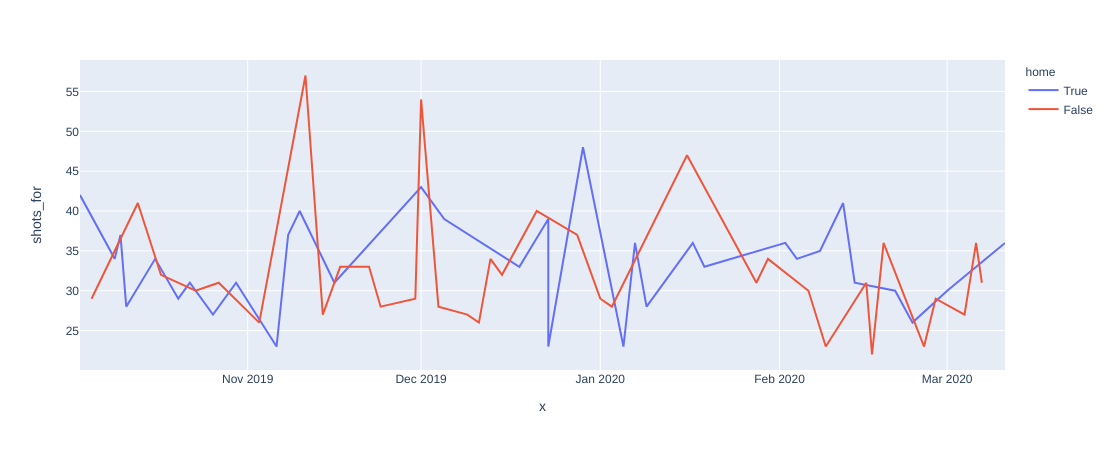

In [151]:
fig = px.line(tor, x=tor.index, y='shots_for', color='home')

fig.show()